# Лабораторная работа №7. Кластеризация данных.

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (7, 4)
od.download("https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: marynadik
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


100%|██████████| 1.55k/1.55k [00:00<00:00, 959kB/s]

## K-mean и DBSCAN на сгененрированных данных

[3 3 1 1 0 3 0 1 3 3 2 3 0 0 0 0 1 2 0 3 0 2 3 2 2 3 3 3 1 1 2 3 1 1 0 0 2
 3 3 3 1 3 3 1 1 1 3 0 3 1 3 2 1 2 2 3 1 1 2 0 2 0 1 3 1 3 0 0 0 3 0 1 2 3
 0 2 2 1 3 2 3 0 3 0 3 0 3 0 1 1 0 1 3 2 3 3 2 2 0 2 1 2 1 0 1 0 2 2 0 0 3
 1 0 0 2 2 3 2 2 2 1 1 2 1 2 0 0 2 3 3 1 1 0 0 3 0 3 1 2 2 1 1 1 2 1 2 1 1
 1 1 1 1 2 0 1 2 2 2 2 0 0 0 1 1 3 3 3 0 3 0 0 0 2 0 3 3 0 2 3 2 2 0 3 0 2
 2 0 0 1 3 3 2 1 1 3 2 2 2 0 1]


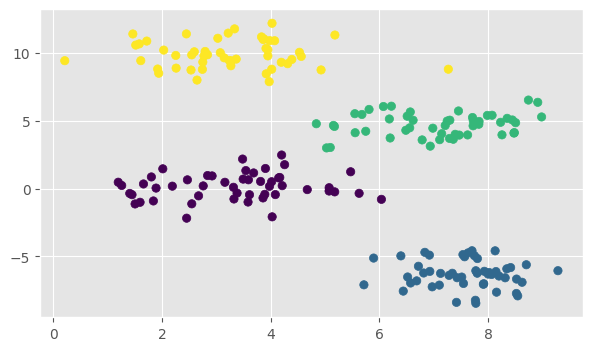

In [ ]:
X, y = make_blobs(centers=4, n_samples=200, random_state=18)
plt.scatter(X[:,0], X[:,1], c=y)
print(y)

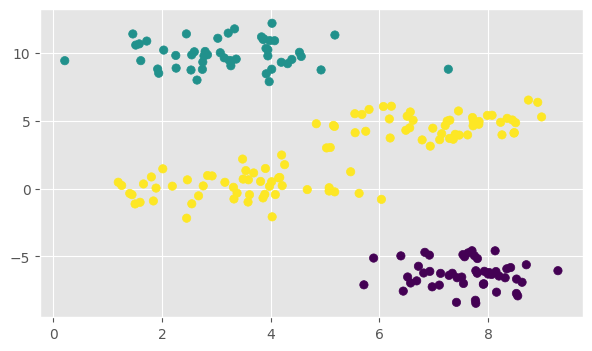

In [ ]:
kmeansModel = KMeans(n_clusters=3).fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeansModel.labels_)

[2943.09687729156, 1443.5724723828644, 414.47917404834766, 360.9818242521659, 326.07368481311363, 281.77327556541974, 254.50135892443544, 249.53286058258783]


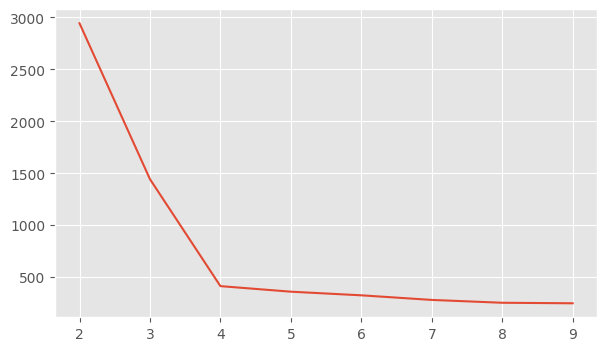

In [ ]:
criteries = []
for k in range(2, 10):
  kmeansModel = KMeans(n_clusters=k, random_state=18)
  kmeansModel.fit(X)
  criteries.append(kmeansModel.inertia_)

print(criteries)
plt.plot(range(2, 10), criteries)

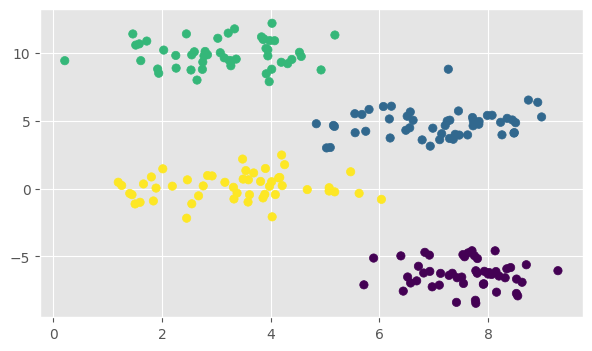

In [ ]:
kmeansModel = KMeans(n_clusters=4).fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeansModel.labels_)

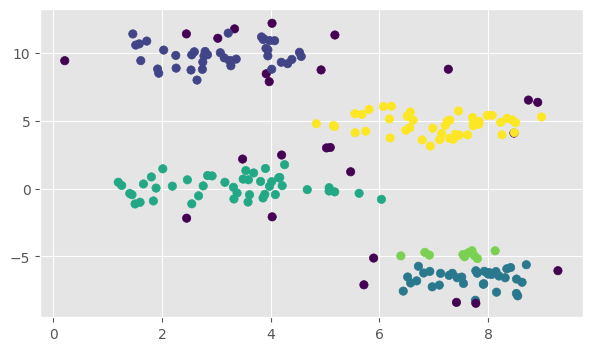

In [ ]:
clustering = DBSCAN(eps=0.75, min_samples=5).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=clustering)

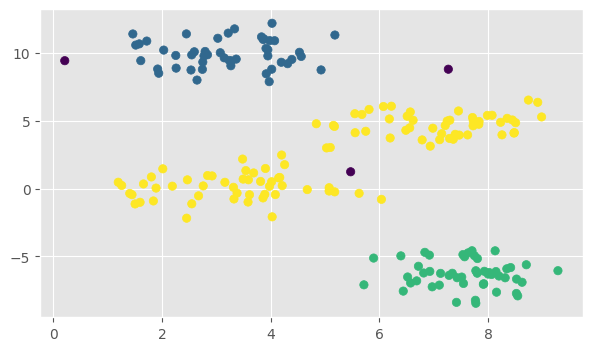

In [ ]:
clustering = DBSCAN(eps=1.2, min_samples=3).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=clustering)

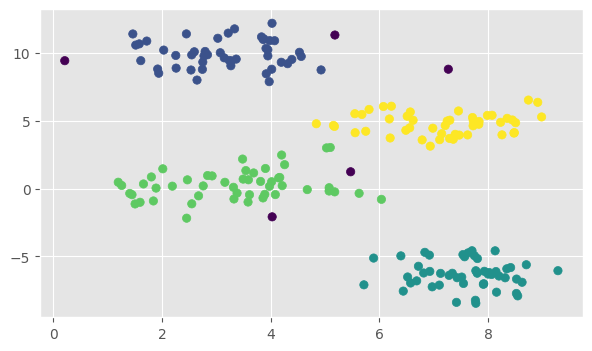

In [ ]:
clustering = DBSCAN(eps=1.15, min_samples=3).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=clustering)

## K-mean и DBSCAN на датасете Mall_Customers

In [ ]:
data = pd.read_csv('customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
for i in data:
  print(data[i].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
['Male' 'Female']
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
[ 15  16  17

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data = (data.replace('Male', 0)).replace('Female', 1)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


<ipython-input-13-048dcd5a4213>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = (data.replace('Male', 0)).replace('Female', 1)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


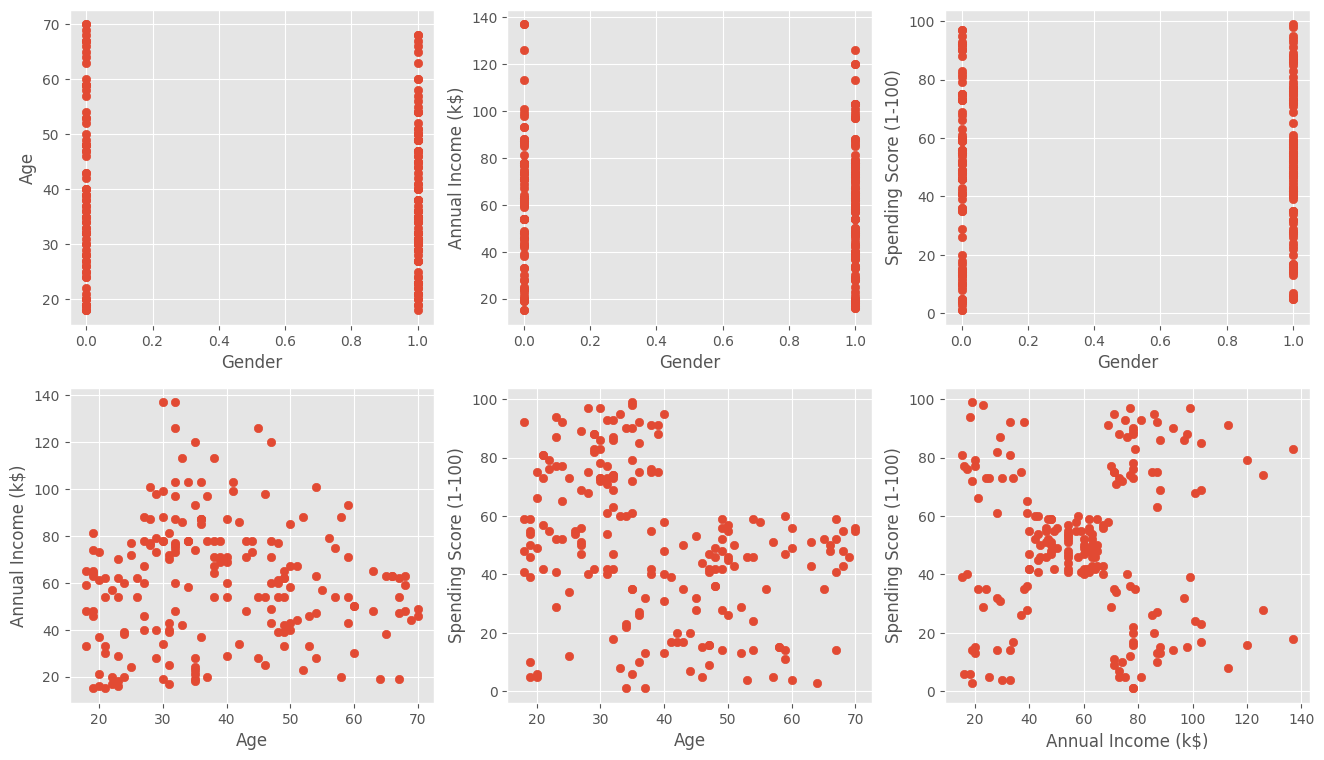

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)

plt.subplot(2, 3, 1)
plt.scatter(data['Gender'], data['Age'])
plt.xlabel('Gender')
plt.ylabel('Age', rotation=90)

plt.subplot(2, 3, 2)
plt.scatter(data['Gender'], data['Annual Income (k$)'])
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)', rotation=90)

plt.subplot(2, 3, 3)
plt.scatter(data['Gender'], data['Spending Score (1-100)'])
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)', rotation=90)

plt.subplot(2, 3, 4)
plt.scatter(data['Age'], data['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)', rotation=90)

plt.subplot(2, 3, 5)
plt.scatter(data['Age'], data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)', rotation=90)

plt.subplot(2, 3, 6)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)', rotation=90)

plt.show()
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
data = data[['Annual Income (k$)', 'Spending Score (1-100)']]
data['Annual Income (k$)'] = data['Annual Income (k$)']* 2 / 137
data['Spending Score (1-100)'] = data['Spending Score (1-100)'] * 2 / 99
data.head()

<ipython-input-15-362e7e2ddbc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Annual Income (k$)'] = data['Annual Income (k$)']* 2 / 137
<ipython-input-15-362e7e2ddbc6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Spending Score (1-100)'] = data['Spending Score (1-100)'] * 2 / 99


,Annual Income (k$),Spending Score (1-100)
0,0.218978,0.787879
1,0.218978,1.636364
2,0.233577,0.121212
3,0.233577,1.555556
4,0.248175,0.808081


[47.95728751325264, 31.12080406322086, 21.747690542200864, 12.623429725990142, 11.911972910713477, 9.690252014449138, 8.254221736389084, 7.534449813926922]


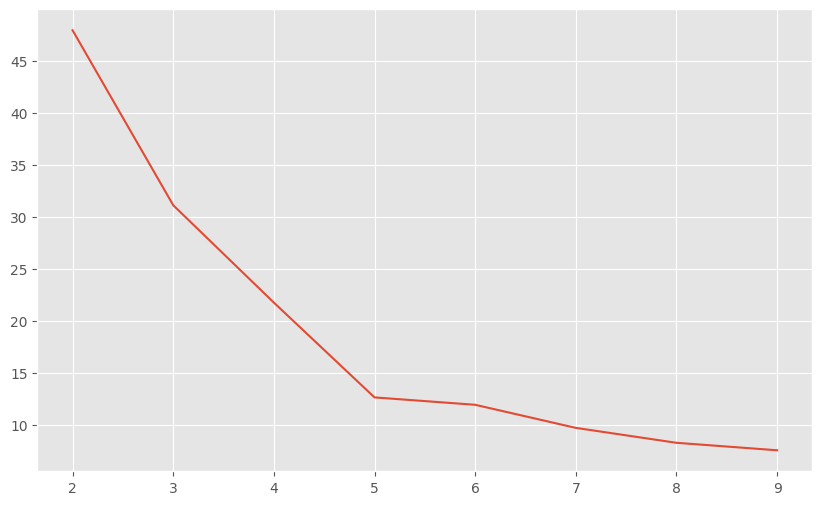

In [ ]:
criteries = []
for k in range(2, 10):
  kmeansModel = KMeans(n_clusters=k)
  kmeansModel.fit(data)
  criteries.append(kmeansModel.inertia_)

print(criteries)
plt.plot(range(2, 10), criteries)

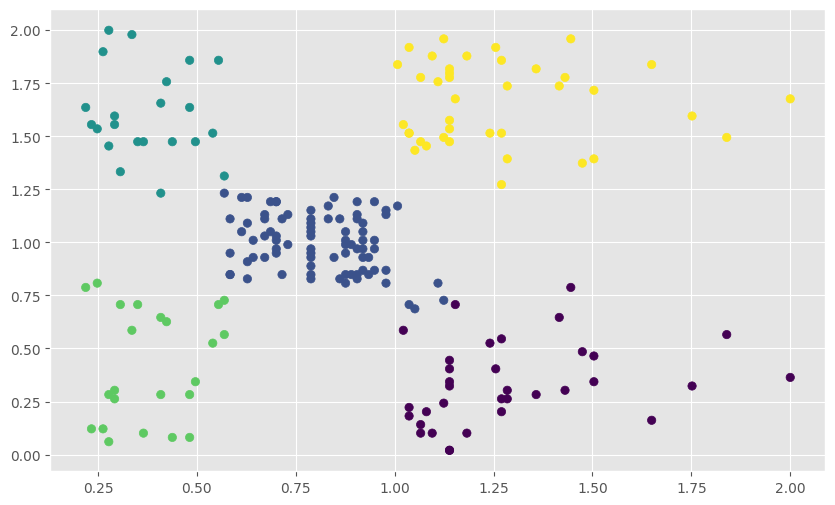

In [ ]:
kmeansModel = KMeans(n_clusters=5).fit(data)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=kmeansModel.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


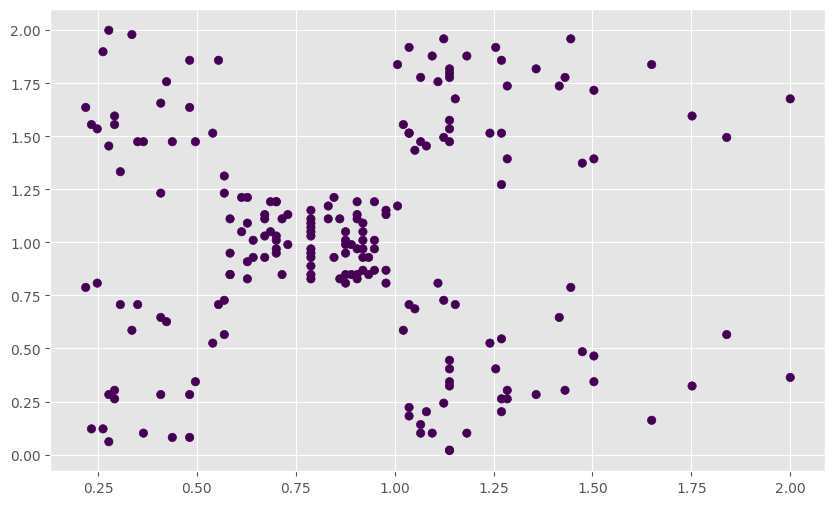

In [ ]:
clustering = DBSCAN(eps=0.5, min_samples=3).fit_predict(data)
print(clustering)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=clustering)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


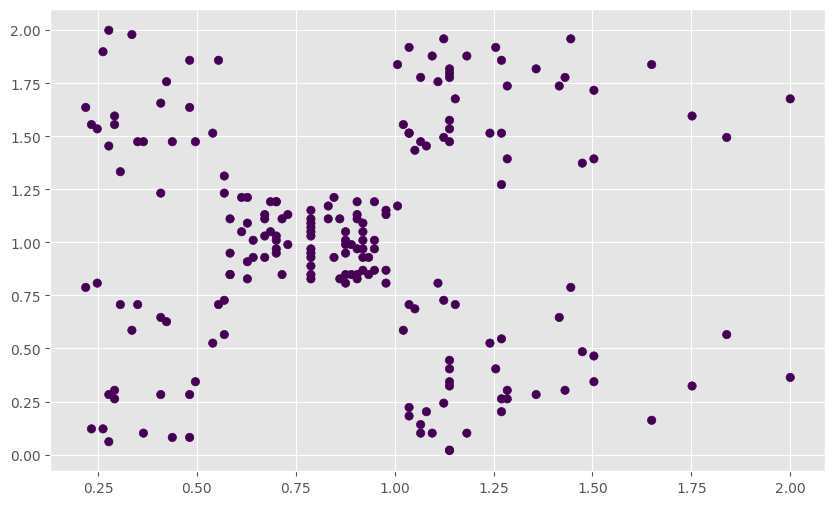

In [ ]:
clustering = DBSCAN(eps=0.01, min_samples=3).fit_predict(data)
print(clustering)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=clustering)

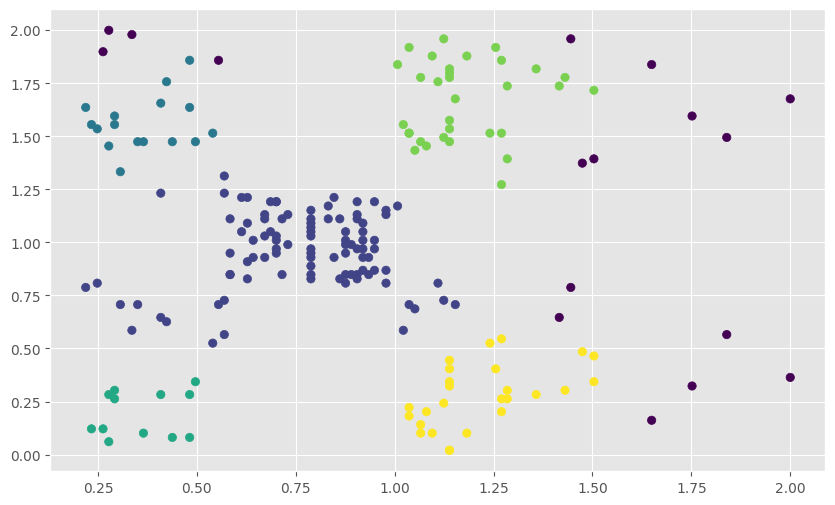

In [ ]:
clustering = DBSCAN(eps=0.165, min_samples=4).fit_predict(data)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=clustering)

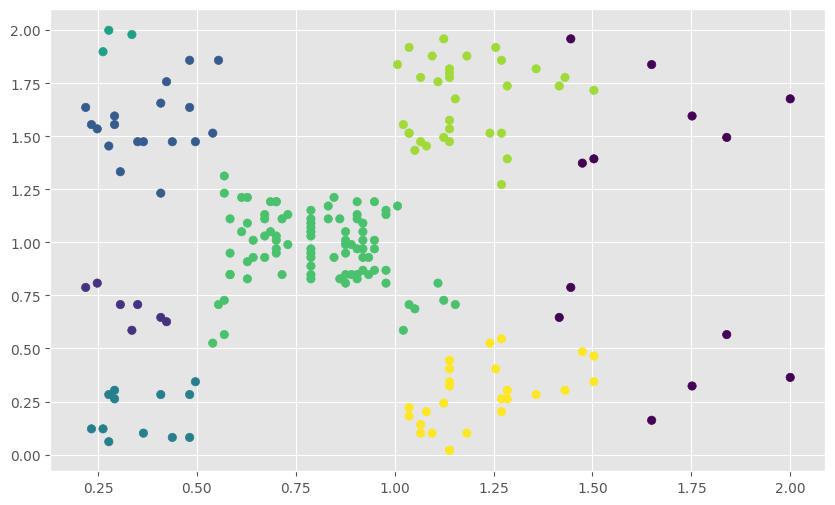

In [ ]:
clustering = DBSCAN(eps=0.15, min_samples=3).fit_predict(data)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=clustering)